<br>
<font color='darkred', size="6">
    <center>
        <b> K-Nearest Neighbor Classification
 </b>
    </center>
</font>

# Data Generation

In [70]:
import random
import matplotlib.pyplot as plt
random.seed(14)

# set toy dataset's parameters
n_class, n_data = 5, 100

# generate a dataset for classification
# x_data: (x1, x2) from -10 to 10
# y_data: integer values for class label

# generate center coordinates
centers = list()
for _ in range(n_class):
    center = list()
    for _ in range(2):
        center.append(random.uniform(-10, 10))
    centers.append(center)

# generate (x1, x2) and class label
x_data, y_data = list(),list()

for class_idx in range(n_class):
    # take the class' center
    center = centers[class_idx]
    
    class_x_data, class_y_data = list(), list()
    for _ in range(n_data):
        # random dispersion from the center
        x1 = center[0] + random.gauss(0,1)
        x2 = center[1] + random.gauss(0,1)
        class_x_data.append([x1,x2])

        class_y_data.append(class_idx)
    x_data += class_x_data
    y_data += class_y_data

# data to be classified  
cls_x_data = [random.uniform(-10,10) for _ in range(2)]

template = \
    '# of the samples in the dataset: {}\n' + \
    '# of the features of x vectors: {}\n\n'
print(template.format(len(x_data), len(x_data[0])))

# of the samples in the dataset: 500
# of the features of x vectors: 2




# Data Visualization

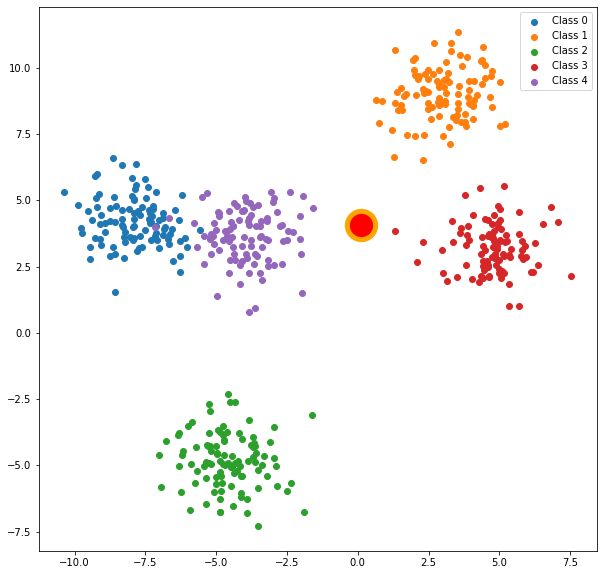

In [71]:
fig, ax= plt.subplots(figsize=(10,10))

for class_idx in range(n_class):
    # extract the class data using list slicing
    class_x_data = x_data[class_idx*n_data : (class_idx+1)*n_data]
    
    # extract x1, x2 lists using list comprehension
    class_x1_data = [class_x_data[i][0] for i in range(n_data)]
    class_x2_data = [class_x_data[i][1] for i in range(n_data)]
    
    ax.scatter(class_x1_data, class_x2_data, label="Class " + str(class_idx) )

ax.legend()
# draw the sample to be classified
ax.scatter(cls_x_data[0], cls_x_data[1], s=800, color='r', edgecolor='orange', linewidth=5 )

# Calculation of Distances


In [72]:
distances = list()

for X,y in zip(x_data, y_data):
    e_distance = 0
    e_distance += (X[0] - cls_x_data[0])**2 + (X[1] - cls_x_data[1])**2
    e_distance **= 0.5
    distances.append(e_distance)
    
print("# of distances calculated: ", len(distances))

# of distances calculated:  500


# Distance Sorting

Minimum sorted distances:  [1.2228753136673771, 1.8042842021305954, 2.177528004354153, 2.2053526206283545, 2.2682341049574233]
Minimum sorted distances indices:  [337, 433, 417, 459, 338]


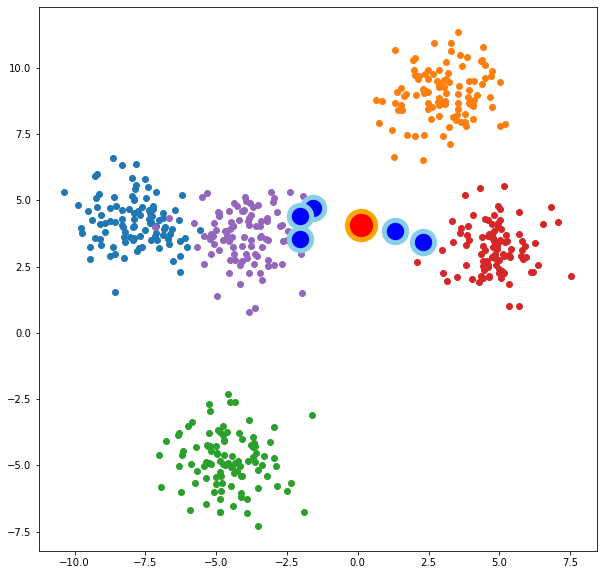

In [83]:
# set K value
K = 5

sorted_distances = list()
sorted_distance_indices = list()

for _ in range(K):
    m, m_idx = None, 0
    
    for dist_idx, dist in enumerate(distances):        
        if dist_idx in sorted_distance_indices:
            pass
        elif m == None or m > dist:
            m = dist
            m_idx = dist_idx
    sorted_distances.append(m)
    sorted_distance_indices.append(m_idx)

print("Minimum sorted distances: ",sorted_distances)
print("Minimum sorted distances indices: ", sorted_distance_indices)

# visualization
fig, ax = plt.subplots(figsize=(10,10))

for class_idx in range(n_class):
    class_x_data = x_data[class_idx*n_data : (class_idx + 1)*n_data]
    
    class_x1_data = [class_x_data[i][0] for i in range(n_data)]
    class_x2_data = [class_x_data[i][1] for i in range(n_data)]
    
    ax.scatter(class_x1_data, class_x2_data, label="Class " + str(class_idx))

ax.scatter(cls_x_data[0], cls_x_data[1], s=800, color='r', edgecolor='orange', linewidth=5)

for close_idx in sorted_distance_indices:
    close_x_data = x_data[close_idx]
    ax.scatter(close_x_data[0], close_x_data[1], s=500, color='b', edgecolor='skyblue', linewidth=5)

# Classification

In [90]:
class_cnt = [0]*n_class

for close_idx in sorted_distance_indices:
    class_cnt[y_data[close_idx]] += 1
    
print("frequencies of K close class data: ", class_cnt)
    
M, M_idx = class_cnt[0], 0
for class_idx, class_freq in enumerate(class_cnt):
    if class_freq > M:
        M = class_freq
        M_idx = class_idx
    
print("Classified as :", M)

frequencies of K close class data:  [0, 0, 0, 2, 3]
Classified as : 3
